In [3]:
import pandas as pd
import numpy as np

In [4]:
df = pd.read_excel('/home/x/documentos/fep/orientacoes/2023_2024/patricia_silva/Merged_File_v7_skin.xlsx')
df['Location'] = df['Location'].str.strip()
df.loc[df['Location'].eq('Faro') & df['Screening_date'].eq('2022-08-13'), 'Screening_date'] = '2022-08-14'
df.loc[df['Location'].eq('Lisboa') & df['Screening_date'].eq('2023-05-15'), 'Screening_date'] = '2023-05-19'

df.head()

FileNotFoundError: [Errno 2] No such file or directory: '/home/x/documentos/fep/orientacoes/2023_2024/patricia_silva/Merged_File_v7_skin.xlsx'

In [3]:
d1 = df.groupby(['Location', 'Screening_date'], as_index=False).size().sort_values(['Location', 'Screening_date'])
d2 = d1.assign(count = d1.groupby(['Location'])['Location'].transform('count'))
d2 = d2[d2['count'].ne(1)]

d2['ndays'] = d2.groupby('Location')['Screening_date'].diff()
d2['nscreens'] = d2['size'].values/d2['ndays'].dt.days
d2

,Location,Screening_date,size,count,ndays,nscreens
1,Abrantes,2022-07-23,95,4,NaT,NaN
2,Abrantes,2022-10-01,101,4,70 days,1.442857
3,Abrantes,2023-06-29,103,4,271 days,0.380074
4,Abrantes,2023-12-02,101,4,156 days,0.647436
5,Albufeira,2023-01-21,40,2,NaT,NaN
6,Albufeira,2023-04-22,101,2,91 days,1.109890
7,Alcanena,2022-07-05,96,2,NaT,NaN
8,Alcanena,2023-06-15,92,2,345 days,0.266667
10,Alcácer do Sal,2022-10-29,81,2,NaT,NaN
11,Alcácer do Sal,2023-11-11,99,2,378 days,0.261905


In [4]:
date_range = pd.date_range(start='2022-03-03', end='2024-04-20') #datas mais extremas no dataset

datesdf = pd.DataFrame(date_range, columns=['Screening_date'])

list_dfs = []

groups = d2.groupby('Location')

for _, group in groups:
    list_dfs.append(datesdf.merge(group, how='left').bfill().ffill())

d3 = pd.concat(list_dfs)
d3

,Screening_date,Location,size,count,ndays,nscreens
0,2022-03-03,Abrantes,95.0,4.0,70 days,1.442857
1,2022-03-04,Abrantes,95.0,4.0,70 days,1.442857
2,2022-03-05,Abrantes,95.0,4.0,70 days,1.442857
3,2022-03-06,Abrantes,95.0,4.0,70 days,1.442857
4,2022-03-07,Abrantes,95.0,4.0,70 days,1.442857
...,...,...,...,...,...,...
775,2024-04-16,Évora,93.0,2.0,315 days,0.295238
776,2024-04-17,Évora,93.0,2.0,315 days,0.295238
777,2024-04-18,Évora,93.0,2.0,315 days,0.295238
778,2024-04-19,Évora,93.0,2.0,315 days,0.295238


In [5]:
d4 =d3.groupby('Screening_date')['nscreens'].sum()

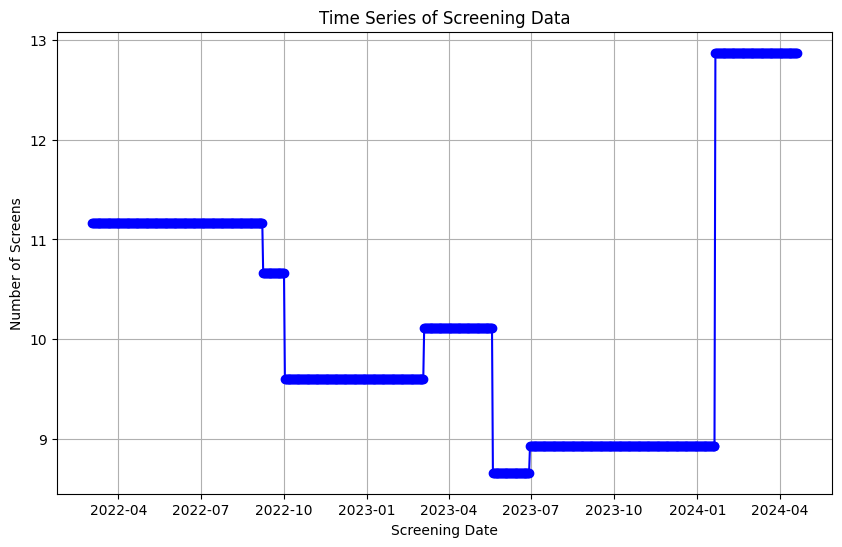

In [6]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(d4.index, d4.values, marker='o', linestyle='-', color='b')
plt.title('Time Series of Screening Data')
plt.xlabel('Screening Date')
plt.ylabel('Number of Screens')
plt.grid(True)
plt.show()


In [7]:
d4.to_excel('/tmp/new_dataset.xlsx')